In [1]:
# 라이브러리 사용
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf 

In [2]:
# NOT MNIST 이미지 다운로드
!wget -q https://raw.githubusercontent.com/blackdew/tensorflow1/master/csv/notMNIST_small.tar.gz
!tar -xzf notMNIST_small.tar.gz

In [3]:
# 이미지 읽어서 데이터 준비하기
paths = glob.glob('./notMNIST_small/*/*.png')
paths = np.random.permutation(paths)
inde = np.array([plt.imread(paths[i]) for i in range(len(paths))])
de = np.array([paths[i].split('/')[-2] for i in range(len(paths))])
print(inde.shape, de.shape)

(18724, 28, 28) (18724,)


In [4]:
de[0:10]

array(['J', 'E', 'H', 'H', 'G', 'G', 'C', 'G', 'E', 'C'], dtype='<U1')

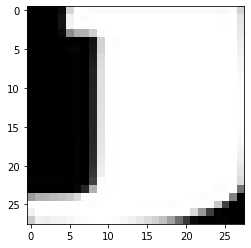

In [5]:
plt.imshow(inde[0], cmap='gray')

In [6]:
inde = inde.reshape(18724, 28, 28, 1) # 입력에 맞게 reshape
de = pd.get_dummies(de) # 원 핫 인코딩
print(inde.shape, de.shape)

(18724, 28, 28, 1) (18724, 10)


In [7]:
# 모델을 완성합니다. 
X = tf.keras.layers.Input(shape=[28, 28, 1])
 
H = tf.keras.layers.Conv2D(6, kernel_size=5, padding='same', activation='swish')(X)
H = tf.keras.layers.MaxPool2D()(H)
 
H = tf.keras.layers.Conv2D(16, kernel_size=5, activation='swish')(H)
H = tf.keras.layers.MaxPool2D()(H)
 
H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(120, activation='swish')(H)
H = tf.keras.layers.Dense(84, activation='swish')(H)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)
 
model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')

In [8]:
# 모델을 학습
model.fit(inde, de, epochs=10)

Epoch 1/10
586/586 [==============================] - 4s 3ms/step - loss: 0.7552 - accuracy: 0.7722
Epoch 2/10
586/586 [==============================] - 2s 3ms/step - loss: 0.2745 - accuracy: 0.9157
Epoch 3/10
586/586 [==============================] - 2s 3ms/step - loss: 0.2115 - accuracy: 0.9349
Epoch 4/10
586/586 [==============================] - 2s 3ms/step - loss: 0.1695 - accuracy: 0.9470
Epoch 5/10
586/586 [==============================] - 2s 3ms/step - loss: 0.1419 - accuracy: 0.9544
Epoch 6/10
586/586 [==============================] - 2s 3ms/step - loss: 0.1216 - accuracy: 0.9605
Epoch 7/10
586/586 [==============================] - 2s 3ms/step - loss: 0.0939 - accuracy: 0.9698
Epoch 8/10
586/586 [==============================] - 2s 3ms/step - loss: 0.0861 - accuracy: 0.9724
Epoch 9/10
586/586 [==============================] - 2s 3ms/step - loss: 0.0697 - accuracy: 0.9765
Epoch 10/10
586/586 [==============================] - 2s 3ms/step - loss: 0.0539 - accuracy: 0.9814

In [9]:
# 모델 이용
pred = model.predict(inde[0:5])
pd.DataFrame(pred).round(   2)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [10]:
# 정답 확인
de[0:5]

,A,B,C,D,E,F,G,H,I,J
0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,0


In [11]:
# 모델 확인
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120 